# Introducción

En este cuaderno vamos a desarrollar un análisis de regresión múltiple.




# Leer el fichero de datos

Un fichero se puede leer de varias formas. Nosotros vamos a ver una forma fácil y práctica

Si sincronizamos el cuaderno de Google Colab con nuestro Drive tendremos acceso a todos los ficheros de Drive. Para ello abrimos el menu de la derecha de Colab, pulsamos en el en el icono `Archivos` y después en el icono `activar Drive`. El cuaderno quedará sincronizado con nuestro Drive automáticamente. La sincronización se ejecuta automáticamente cada vez que se abra el cuaderno.

Una vez sincronizado, para acceder a un fichero concreto de Drive, tenemos que especificar la ruta de acceso. La ruta se puede copiar en el portapapeles abriendo el menu contextual en el fichero correspondiente (poner el cursor encima del fichero y pulsar en los tres puntos verticales para abrir el menu contextual)

Una vez hemos sincronizado con Drive y tenemos la ruta de acceso al fichero, podemos leer los datos en un `DataFrame` de Pandas


In [2]:
# Librerias
import pandas as pd
import numpy as np


In [ ]:
# Acceder a mi drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Leer un fichero excel de my Google-Drive a una variable del cuaderno
ruta = "/content/drive/MyDrive/uc3m/Data/Advertising.xlsx"
df = pd.read_excel(ruta)


In [ ]:
# Leer un fichero excel subido al cuaderno a una variable del cuaderno

df = pd.read_excel('Advertising.xlsx')


In [5]:
# Ver el contenido del DataFrame df
df


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
# Ver las columnas del DataFrame
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

# Inspeccionar las variables

* Visualizar los datos cruzando todas las variables dos a dos en una matriz de gráficos xy. La forma más sencilla de hacerlo es `Pandas`

* Calcular la matriz de correlaciones para tener una medidad cuantitativa de la asociación lineal entre las variables

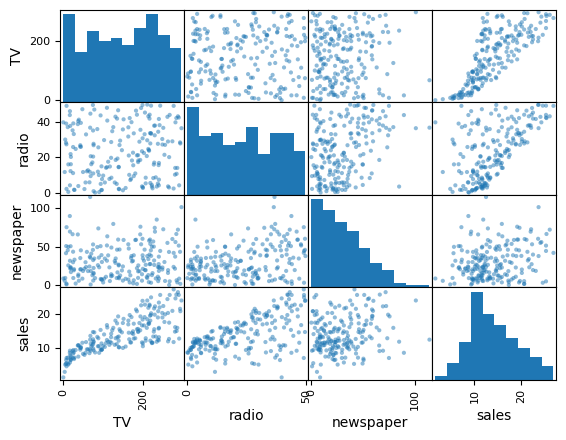

In [ ]:
# Cruzar las variables dos a dos en una matriz de graficos xy
# Solo hae falta Pandas
pd.plotting.scatter_matrix(df);

In [ ]:
# Lo mismo pero más bonito con la librería Plotly
# Cruzar las variables dos a dos en una matriz de graficos xy

import plotly.express as px
px.scatter_matrix(df)
# Otra forma: guardar el gráfico en el objeto graf y luedo mostrarlo
# graf = px.scatter_matrix(df)
# graf.show()

In [ ]:
# Calcular la matriz de correlaciones
matriz_de_correlaciones=df.corr()
matriz_de_correlaciones

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


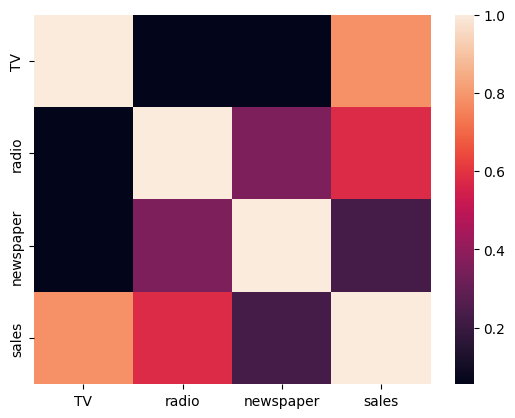

In [ ]:
# Hacer un gráfico heatmap de la mtriz de correlaciones
# Hace falta matplotlib y seaborn

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(matriz_de_correlaciones);

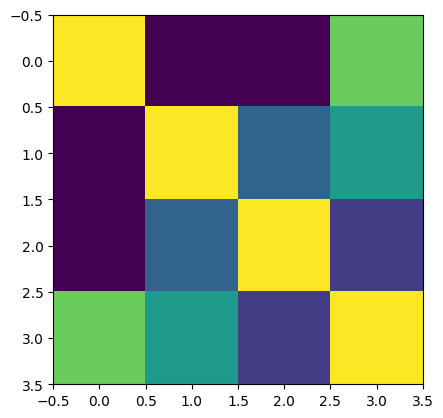

In [ ]:
# Ahora con el gráfico "imshow()" de "matplotlib"

fig, ax = plt.subplots()
im = ax.imshow(matriz_de_correlaciones)
plt.show()


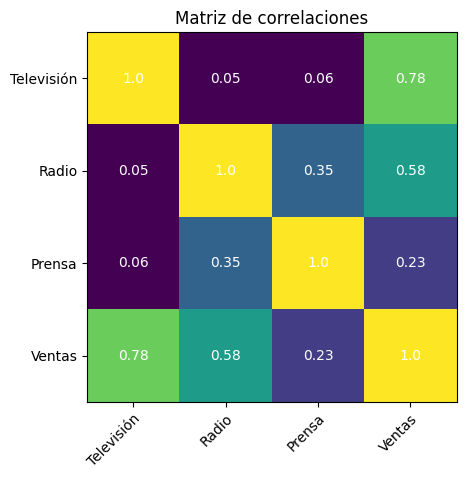

In [ ]:
# Ahora con "Matplotlib" otra vez pero añadiendo
# nombre de la variable, título del gráfico y correlaciones

import matplotlib as mpl
import matplotlib.pyplot as plt

variables =["Televisión", "Radio", "Prensa", "Ventas"]

fig, ax = plt.subplots()
im = ax.imshow(matriz_de_correlaciones)

# Poner el nombre de las variables en el gráfico
ax.set_xticks(np.arange(len(variables)), labels=variables)
ax.set_yticks(np.arange(len(variables)), labels=variables)

# Rotar los nombres del eje x para que quepan mejor
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Mostrar el valor de las correlaciones con dos decimales
for i in range(len(variables)):
    for j in range(len(variables)):
        text = ax.text(j, i,round(matriz_de_correlaciones.iloc[i, j],2),
                       ha="center", va="center", color="w")

# Poner un título al gráfico
ax.set_title("Matriz de correlaciones")

# Mostrar el gráfico
plt.show()

# Modelo de regresión

* Variable dependiente: ventas
* Variables independientes: Gasto en publicidad en TV, Radio y Prensa

Hacer un modelo de regresión lineal consiste en encontrar los parámetros "betas" que cumplan

$β_0+β_1x_{i1}+\dots+β_dx_{id}+e_i=\hat{y_i}+e_i=y_i, \quad i=1,\dots,n$

También podemos expresar el conjunto de las n ecuaciones en forma matricial

$xβ+e=\hat{y}+e={y}$

Donde $x$ es la matriz de datos añadiendo un vector de unos a la izquierda y β es un vector con $d+1$ componentes

Las "betas" se pueden determinar imponiendo las siguientes condiciones, todas ellas equivalentes


* Por mínimos cuadrados, es decir, encontrar las "betas" que minimizan la suma de los errores al cuadrado:

 $\sum{e_i^2}=\sum{(\hat{y_i}-y_i)^2}$

* Proyectando ortogonalmente el punto $y$ en el subespacio vectorial generado por el vector de unos $(1,\dots,1)$ y los vectores $x_i, i=1,\dots,d$, es decir, encontrar las "betas" que definen la combinación lineal del punto del subespacio anterior $\hat{y} $ más próximo a $y$

* Máxima verosimilitud. Este método lo explicaremos más adelante con mayor detalle. Básicamente consiste en (i) suponer que los datos se ajustan a un modelo probabilístico paramétrico y (ii) determinar los parámetros de ese modelo maximizando una función llamada "función de verosimilitud". Las ecuaciones que hay que resolver para maximizar la verosimilitud son las mismas que hay que resolver para minimizar la suma de los errores al cuadrado. La ventaja de utilizar un modelo probabilístico reside en que todas las propiedades del modelo se pueden aplicar a los datos



## Mínimos cuadrados con `scikit learn`

Utilizaremos el módulo `linear_model` de la librería `scikit-learn`

Siempre utilicemos un modelo en Python, primero hay que "instanciar" el modelo y luego pasarle los datos. En este caso el modelo que vamos a "instanciar" es `LinearRegression()` y los datos que vamos a pasar al modelo serán los valores de las  variables independientes $x$ (es una matriz) y los valores de la variable dependiente $y$ (es un vector).

La palabra "instanciar" se utiliza para indicar que hemos definido una instancia del modelo genérico dandole el nombre que nosotros queramos. Podemos tener varias instancias del mismo modelo y pasarle a cada instancia datos distintos



In [ ]:
# Poner las variables independientes en la matriz x
# Poner las variables   dependientes en el vector y

x=np.array(df[['TV','radio','newspaper']])
y=np.array(df['sales'])

In [ ]:
from sklearn import linear_model # importar el módulo de la librería
mi_regresion = linear_model.LinearRegression() # "instanciar" el modelo
mi_regresion.fit(x,y) # pasar los datos al modelo


LinearRegression()

In [ ]:
# Obtener b1, b2 y b3
mi_regresion.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [ ]:
# Obtener b0, es decir, la intersección en el origen
mi_regresion.intercept_

2.938889369459412

## Mínimos cuadrados

Vamos a implementar el método de mínimos cuadrados definiendo nosotros todo o que necesitamos, es decir, sin utilizar rutinas que ya están definidas en Python

Primero definimos la función RSS (Residual Sum of Squares) suma de errores al cuadrado. Esta función depende de las betas y de los datos

Después buscamos los betas que minimizan esa función

In [ ]:
# Creación de la matriz de datos x,y en Numpy
x=np.array(df[['TV','radio','newspaper']])
y=np.array(df['sales'])
x=np.c_[np.ones(len(x)),x] # añadir un vector de unos a la izquierda


In [ ]:
x


array([[  1. , 230.1,  37.8,  69.2],
       [  1. ,  44.5,  39.3,  45.1],
       [  1. ,  17.2,  45.9,  69.3],
       [  1. , 151.5,  41.3,  58.5],
       [  1. , 180.8,  10.8,  58.4],
       [  1. ,   8.7,  48.9,  75. ],
       [  1. ,  57.5,  32.8,  23.5],
       [  1. , 120.2,  19.6,  11.6],
       [  1. ,   8.6,   2.1,   1. ],
       [  1. , 199.8,   2.6,  21.2],
       [  1. ,  66.1,   5.8,  24.2],
       [  1. , 214.7,  24. ,   4. ],
       [  1. ,  23.8,  35.1,  65.9],
       [  1. ,  97.5,   7.6,   7.2],
       [  1. , 204.1,  32.9,  46. ],
       [  1. , 195.4,  47.7,  52.9],
       [  1. ,  67.8,  36.6, 114. ],
       [  1. , 281.4,  39.6,  55.8],
       [  1. ,  69.2,  20.5,  18.3],
       [  1. , 147.3,  23.9,  19.1],
       [  1. , 218.4,  27.7,  53.4],
       [  1. , 237.4,   5.1,  23.5],
       [  1. ,  13.2,  15.9,  49.6],
       [  1. , 228.3,  16.9,  26.2],
       [  1. ,  62.3,  12.6,  18.3],
       [  1. , 262.9,   3.5,  19.5],
       [  1. , 142.9,  29.3,  12.6],
 

In [ ]:
# Definir la función RSS (suma de errores al cuadrado)
def RSS(betas,x,y):
    return sum((y-x@betas)**2)

In [ ]:
# Definir unas betas iniciales para poder hacer cálculos
betas=np.array([1,0,1,1])

In [ ]:
# Comprobar la función RSS funciona
RSS(betas,x,y)

494004.31000000023

In [ ]:
# Otra forma de calcular la suma de los errores al cuadrado
(y-x@betas)@(y-x@betas)

494004.31000000006

In [ ]:
# Encontrar los betas que minimizan la RSS
from scipy.optimize import minimize
optimo=minimize(RSS,betas,args=(x,y))
betas=optimo.x
betas

array([ 2.93889133e+00,  4.57646256e-02,  1.88530030e-01, -1.03748792e-03])

## Proyeccion ortogonal


In [ ]:
# Poner las variables independientes en la matriz x
# Poner las variables   dependientes en el vector y
x=np.array(df[['TV','radio','newspaper']])
y=np.array(df[['sales']])


In [ ]:
# Creamos la matrix x añadiendo la columna con unos y quitando la y
x=np.array(df) # crear el array a partir del DataFrame
x=np.delete(x, 3, axis=1) # Quitar la variable depediente, es decir, quitar "sales", quitar la columna 3
x=x=np.insert(x, 0,np.ones(len(x)) , axis=1) # Añadir un vector de unos
x


In [ ]:
# Calculo de las betas del modelo betas=inversa(x'@x)@x'@y
betas=np.linalg.inv(x.T@x)@x.T@y
betas

array([[ 2.93888937e+00],
       [ 4.57646455e-02],
       [ 1.88530017e-01],
       [-1.03749304e-03]])

In [ ]:
# Calculo de la matriz proyección P= x@inversa(x'@x)@x'
P=x@np.linalg.inv(x.T@x)@x.T

In [ ]:
# Cálculo de las predicciones y^=Py
y_hat=P@y

## Por minimos cuadrados con statsmodels

Es el método más "estadístico" porque estamos imponiendo un modelo estadistico a los datos.

Estamos suponiendo que el error tiene una distribucuón normal

Por lo tanho cada observación de y es un variable aleatoria normal conb media cero y desviación estándar sigma
Todas las yi tienen la misma desv est

Este modelo inicialmente puede parecer muy específoco, pero en general es muy robusto

cuando la linealidad no funciona hay trucos para que funcione

La ventaja de asumir el modelo: poder usar las rpopiedades del modelo



In [ ]:
# importar la librería statsmodels
import statsmodels.api as sm

In [ ]:
# Pasar el DataFrame a la matrix x y el vector y
x=np.array(df[['TV','radio','newspaper']])
y=np.array(df['sales'])

# Añadir el vector de unos a la matriz x. OJO! otra forma de hacerlo
x = sm.add_constant(x)

# "Instanciar" el modelo de regresión.
# OJO! Al definir la instancia se pasan los datos
modelo = sm.OLS(y,x)

# Ajustar el modelo de regresión
regre=modelo.fit()



In [ ]:
print(regre.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           1.58e-96
Time:                        19:18:05   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

### Resultados de statsmodels
* R-squared: $R^2=1-\frac{RSS}{TSS}$, mide el porcentaje de varianza explicada por el modelo. Es un valor entre 0 y 1

* F-statistis: $\frac{MSS/k}{RSS/(n-k-1)}$ Es un estadístico que tiene una distribución de F de Snedecor bajo la hipótesis nula "todos los coeficientes son cero". Valores superiores a 3 o 4 implican que dicha hipótesis nula es falsa, por lo tanto se acepta la hipótesis alternativa: "al menos algún coeficiente es distinto de cero"

* La tabla en la que se analizan los coeficientes de los regresores aparecen las siguientes columnas:
 * coef: valor estimado del coeficiente
 * std err: desviación típica del estimador del coeficiente
 * t, es el valor de la t de student que resulta bajo la hipótesis nula "el coeficiente vale 0". En la medida en que ese valor sea inferior a -2 o superior a 2, hay que rechazar la hipótesis nula.
 * p>|t|, es el p-valor de la t obtenida bajo la hipótesis nula "el coeficiente vale cero". En el ejemplo se puede descartar esa hipótesis para todos los coeficientes excepto para el coeficiente de x3
 * [0.025 - 0.975] es el intervalo de confianza para el coeficiente con un nivel de significación del 5% o con una confianza del 95%. Evidentemente, cuando el intervalo de confianza contiene el cero, no podemos rechazar la hipótesis nula de que el coeficiente es distinto de cero

* Skew, el la asimitría de la distribución de los errores. Valores entre -2 y 2 serían tolerables

* Kurtosis, es el grado de curtosis de la distribución de los errores. La curtosis miden si las colas de la distribución tienen más masa de probabilidad que las colas de la normal. Cuanto más cercano a cero sea la curtosis, mayor parecido a la distribución normal. Valores inferiores a -2 y superiores a 2 son excesivos pueden indicar una deviación significativa respecto de la normal

* Durbin-Watson, es un test que mide la autocorrelación de los errores. Es relevante cuando las observaciones tienen una estructura temporal, es decir, cuando se observan de forma secuencial. Idealmente debe tomar el valor 2 o bien no desviarse más de un 15% de dicho valor. Cuando los datos no son secuenciales el estadístico es irrelevante

* Jarque-Bera, es un estadístico para contrastar la normalidad de los errores. Tiene una distribución asintóticamente como una chi cuadrado con dos grados de libertad bajo la hipótesis nula de que los datos pertenecen a una distribución normal. Es un test de normalidad basado en la asimistria y la curtosis. Para determinar el nivel de confianza de la hipótesis nula se puede observar el p-valor Prob(JB) que aparece a continuación en la tabla




## Maxima verosimilitud

Para aplicar el método de la máxima verosimilitud tenemos que imponer un modelo probabilístico y paramétrico a los datos y después calcular los parámtetros de esde modelo maximizando la función de verosimilitud


El modelo probabilístico que imponemos a los datos es el siguiente:

* Las observaciones de la variable dependiente tienen una distribución normal de media $x_iβ$ y varianza común $σ^2$. Además son independientes

La afirmación anterior es equivalente a

* Los datos verifican  $β_0+β_1x_i+\dots+β_dx_i+e_i=y_i\quad  i=1,\dots,n$

Los valores de las variables independientes $x_i$ son deterministas. Los errores $e_i$ son variables aleatorias y por lo tanto los valores de la variable dependiente $y_i$ son resultados de variables aleatorias.

Podemos expresar lo anterior de cuaquiera de las siguientes formas equivalentes:


* $e_i\sim N(0,σ^2)$
* $y_i\sim N(x_iβ,σ^2)$

Dado que el vector $y=[y_i]$ es un vector de realizaciones de variables aleatorias normales independientes, la densidad conjunta será el producto de las densidades:

$p(y)=p(y_1)\dots p(y_n)=Π\frac{1}{\sqrt{2\pi}σ}e^{-\frac{(y_i-x_iβ)^2}{2σ}}$


Vemos que la densidad conjunta depende de las betas, los datos y además la varianza del modelo. El objetivo es maximizar el valor de la densidad conjunta en función de las betas y la varianza.
En vez de maximizar esa función, resulta más operativo maximizar el logaritmo de esa función, ya que es más fácil de tratar analíticamente

$\log{p(y)}=\sum{\log{\frac{1}{\sqrt{2\pi}σ}}}-\sum{\frac{(y_i-x_iβ)^2}{2σ}}$


Cambiando el signo, en vez de maximizar podemos minimizar. Entonces buscamos los betas y la sigma que minimizan la siguiente función:

$LV(β,σ)=2n\log{\sigma^2}+\sum{\frac{(y_i-x_iβ)^2}{2σ}}$

Para encontrar los parámetros (betas y desviación típica) que minimizan esa función podemos derivar respecto de los parámetros e igualar a cero. Encontraremos las mismas ecuaciones que las de mínimos cuadrados más otra ecuación para calcular la desviación típica.

El valor de la desviación típica que se obtiene por el método de la máxima verosimilitud está ligeramente sesgado a la baja. Normalmente se toma como estimador de la varianza la suma de los errores al cuadrado dividido por el número de grados de libertad del modelo

Varianza estimada por MV:   $σ^2=\frac{\sum{e_i^2}}{n}$

Varianza estimada sin sesgo:   $σ^2=\frac{\sum{e_i^2}}{n-k-1}$

Puede observarse que la variable estimada por MV es ligeramente inferior a la varianza estimada no sesgada

# Evaluación del modelo

Una vez estimado el modelo por cualquiera de los métodos anteriores nos podemos preguntar ¿el modelo calculado es bueno o es malo?

Nótese que a partir de un conjunto de datos, **siempre** se puede obtener un modelo de regresión lineal, es decir, siempre podremos encontrar las betas. Ahora bien, aunque las betas obtenidas sean los valores óptimos de una función, eso no quiere decir que el modelo sea bueno.

Por lo tanto necesitamos alguna forma  para evaluar si el modelo obtenido es "bueno" o "malo". Para valorar la bondad del modelo podemos seguir varias estrategias.

**Muestra de entrenamiento y muestra de test**

Una de las formas más habituales hoy en día es dividir la muestra (el dataset) en dos partes, el training-set y el test-set. Para estimar el modelo se utilza el training-set y para evaluar el modelo se utiliza el test-set. Es un sistema muy intuitivo y de sentido común. Si el modelo hace predicciones razonablemente buenas con los datos del test-set, podemos concluir que el modelo generaliza bien y por lo tanto es bueno. La comprobación es muy simple, calculamos la predicción del modelo sobre los datos del test-set y lo comparamos con su valor verdadero para ver el error que comete el modelo cuando utilizamos observaciones "nuevas", es decir, cuando usamos las observaciones del test-set. El analista tiene que valorar si el error del modelo es asumible para el uso que quiera darle al modelo.

Este método puede sofisticarse un poco más utilizando la técnica de validación cruzada o "cross validation" que consiste en estimar varios modelos con el mismo dataset pero considerando varias divisiones de la muestra en training-set y test-set. Para cada división trainong-set test-set obtendríamos un modelo diferente. A la vista de todos los modelos, el analista puede hacer una valoración del comportamiento del modelo lineal.

El método de validación cruzada nos da varios modelos (uno por cada división en training-set / test-set). Por lo tanto si queremos hacer predicciones tendremos varias predicciones, una por cada modelo. ¿Cómo elegir una?. Normalmente se calcula la predicción con todos los modelos y se calcula la predicción promedio.  

**Modelo probabilístico**

Cuando suponemos que los datos provienen de una población con unas características deterinadas, es decir, cuando asumimos que los datos siguen una determinada distribución, lo primero que tenemos que preguntarnos es ¿Tiene sentido hacer esa suposición?

Para valorar si la suposición tiene sentido o no, analizaremos los residuos. Si los residuos siguen una distribución normal, entonces podemos concluir que el modelo lineal se cumple. Si los residuos NO tienen una distribución normal, entonces la hipótesis de la existencia del modelo lineal deja de ser creible



## Los coeficientes de regresión

Los coeficientes de regresión, es decir, las betas no son observables directamnte. Las betas que calculamos (por mínimos cuadrados o por proyección ortogonal) son meras estimaciones de unas betas "verdaderas". Se les llama betas estimadas y se les suele poner un acento circunflejo encima, $\hat{β}$.

Las betas se calculan con los datos observados, por lo tanto, en la medida en que los datos obsevados contienen una componente aleatoria (el error del modelo), son también variables aleatorias. Podemos decir que si observáramos otra muestra obtendríamos otros betas, aunque todas las muestras provengan de la misma población, distintas muestras nos llevarían a estimar distintos betas.

Entonces ¿Cómo podemos conocer las betas "verdaderas"?

En realidad no podemos conocerlas. Los único que podemos averiguar es la distribución de sus estimadores y a partir de esa información calcular intervalos de confianza para la beta "verdadera".

Los intervalos de confianza se construyen así

$β_i$ está en el intervalo $\hat{β}±t_{n-k-1,α/2}\times se$

Donde $t_{n-k-1,α/2}$ es el valor de la variable aleatoria t-student con n-k-1 grados de libertad que cumple que

$Pr(|T|>t_{n-k-1,α/2})=α $

El valor de α se llama nivel de significatividad y al valor de $1-α$ nivel de confianza


Una de cuestiones más relevantes a contrastar es si un regresor tiene influencia o no en la variable dependiente, lo cual es equivalente a contrastar si la beta "verdadera" es igual a cero o es distinta de cero.

Evidentenmente si el valor cero está contenido en el intervalo de confianza, no podremos rechazar la hipótesis nula, es decir, no poderemos rechazar que la beta "verdadera" vale cero, es decir, el coeficiente NO es significativo

Este contraste se hace estableciendo la hipótesis nula H0:"El coeficiente beta es igual a cero". Rechazaremos la hipótesis nula si la probabilidad de que suceda algo así es muy baja

Finalmente se analiza el p-valor. El p-valor de un estadístico es la probabilidad de obtener el valor concreto que se ha obtenido bajo la hipótesis nula

Por ejemplo, si el p-valor del estimador $\hat{β}_i$ es $0,05$ podemos afirmar que la probabilidad de obtener ese valor es muy baja (5%) bajo la hipótesis nula H0: "Beta es igual a cero". Como esa probabilidad es muy baja, rechazamos la hipótesis nula con un nivel de confianza del 95%, o lo que es lo mismo, el parámetro es significativo al 5%

En el caso de las betas, los contrastes se hacen a "dos colas", quiere decir que se considera el p-valor como la probabilidad de obtener el módulo del estadístico



## Los errores

Otro aspecto muy importante para valorar un modelo es verificar que los errores tienen una distribución normal

Lo más práctico es hacer un histograma y verificar visualmente que los errores tienen una distribución muestral

Adicionalmente existe una amplia variedad de tests para verificar analíticamente si los errores tienen una distribución normal



## Valoracion global del modelo

Otro análsis que se suele realizar es valorar si todas las betas son iguales a cero o si existe alguna distinta de cero. Este contraste se realiza con la F-snedecor, F

F es un estadístico (una variable aleatoria) que tiene una distribución conocida. Si el estadístco es mayor de 3 o 4 (dependiendo de los grados de libertad) entonces se puede rechazar la hipótesis nula H0: "Todos los coeficientes son iguales a cero".

El estadístico F se calcula de la siguiente forma:


$F=\frac{MSS/k}{RSS/(n-k-1)}=\frac{MSS/k}{\sigma^2}$



## El problema de la multicolinealidad

Finalmente es importante valorar el grado de multicolinealidad existente entre las variables explicativas. Idealmente las variables explicativas deberían ser independientes, es decir, la correlación entre ellas debería ser cero, o lo que es lo mismo, la matriz de covarianzas deberia ser diagonal (considerando solo las variables explicativas)

La multicolinialidad hace que la estimación de las betas sea muy sensible a la muestra considerada, o lo que es lo mismo, los errores en la estimación sean muy elevados.

Podemos encontrarnos con la aparente paradoja de tener un buen modelo de regresión (un modelo que hace buenas predicciones) pero con unas betas NO significativas. ¿Cómo es posible?

Supongamos un ejemplo extremo en el que dos variables explicativas contienen la misma información pero en distintas unidades. Por ejemplo el peso lo podemos medir en kg o en libras. Sabemos que la relación es 2,2 libras por kg. Si hacemos una regresión de la altura de las personas en función del peso, pero considerando el peso en libras y el peso en kg, podremos encontrar muchas betas optimas, ya que podemos explicar la altura de una persona de igual forma en función de su peso en kg o en libras, o como una combinación del peso medido en ambas unidades.

En los casos en lso que la colinealidad no es perfecta, se produce el mismo fenómeno y las betas son muy sensibles a los valores de la muestra.